# Determine the Equivalent Soil Profile class based on a CPT file

This file provides an example of converting a CPT file into an equivalent soil profile and then classifying it into a standard typology.

### Load inline plotting and auto-reload commands

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import liquepy as lq

from tests.conftest import TEST_DATA_DIR  # path containing CPT file

# plotting
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300

# Makes the plot edges white
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## Load CPT file

In this example we can use the liquepy method since file is in the liquepy standard format.

But any method to load the file and then initiate a CPT object with the following properties is suitable.

 - `depth`: Array of depths from surface
 - `q_c`: Cone tip resistance
 - `f_s`: Skin friction
 - `u_2`: Measured pore pressure
 - `gwl`: Ground water level


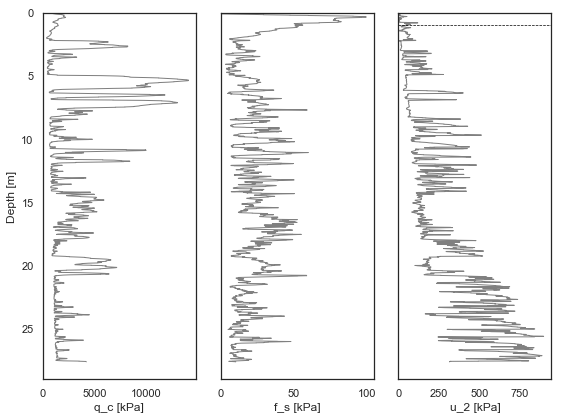

In [3]:
cpt = lq.field.load_cpt_from_file(TEST_DATA_DIR + "standard_1.csv", delimiter=";")

bf, sps = plt.subplots(ncols=3, sharey=True, figsize=(8, 6))

lq.fig.make_cpt_plots(sps, cpt)
plt.show()

## Run triggering method from Boulanger and Idriss (2014)

Method is an implementation of:

 - Boulanger RW, Idriss IM. CPT AND SPT BASED LIQUEFACTION TRIGGERING PROCEDURES. Department of Civil and Environmental Engineering, University of California at Davis; 2014.

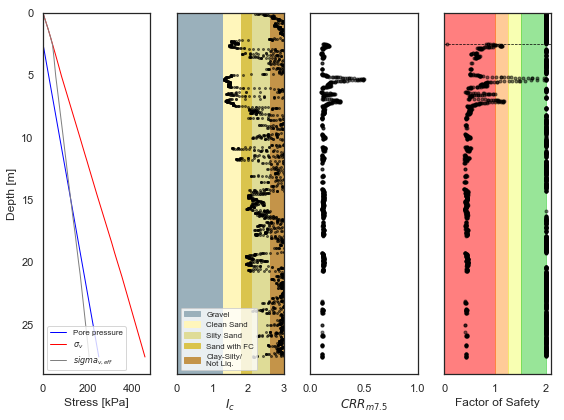

In [4]:
bi2014 = lq.trigger.run_bi2014(cpt, pga=0.25, m_w=7.5, gwl=2.5)
bf, sps = plt.subplots(ncols=4, sharey=True, figsize=(8, 6))
lq.fig.make_bi2014_outputs_plot(sps, bi2014)


## Compute the LSN number

van Ballegooy, S., Wentz, F., & Boulanger, R. W. (2015). Evaluation of a CPT-based liquefaction procedure at regional scale. Soil Dynamics and Earthquake Engineering, 1–20. http://doi.org/10.1016/j.soildyn.2015.09.016

In [5]:
epsilon = lq.trigger.calculate_volumetric_strain(bi2014.factor_of_safety, bi2014.q_c1n_cs)
lsn = lq.trigger.calculate_lsn(epsilon, cpt.depth)
print("LSN: {0:.2f}".format(lsn))

LSN: 25.16
